In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from tqdm import tqdm
from scipy.stats import loguniform

import joblib
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gufra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gufra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Model_1p1

In [2]:
df = pd.read_csv("../dataset/9_class/training.csv")
df.dropna(inplace=True, axis=0)
df.head()

,tanya,jawab,kategori
0,umur saya masih 18 tahun saya tidak obesitasti...,"\n\n<p>Alo, terima kasih atas pertanyaannya un...",Menstruasi
1,hai saya berusia 16 tahun 3 bulan saya mempuny...,"\n\n<p>Selamat pagi, terima kasih telah bertan...",Gigi
2,jika saat saya melakukan sit up kenapa perut s...,"<p>Dear Azizi,\n\nSakit perut sebelah kiri bag...",Cedera
3,belakangan ini saya mengalami diare tapi susah...,"\n\n<p>Alo Adi,</p>\n<p>Terima kasih atas pert...",Demam
4,ter saya perempuan berusia 12 tahun sampe saat...,"\n\n<p>Alo, terimakasih atas pertanyaannya.</p...",Menstruasi


In [3]:
label = {
    'Asam Lambung': 0,
    'Batuk': 1, 
    'Cedera': 2, 
    'Demam': 3,
    'Gatal': 4, 
    'Gigi': 5, 
    'Jerawat': 6, 
    'Menstruasi': 7, 
    'Sakit Kepala': 8
}

In [4]:
df.kategori.value_counts()

kategori
Menstruasi      3200
Gigi            3200
Cedera          3200
Demam           3200
Jerawat         3200
Sakit Kepala    3200
Asam Lambung    3199
Gatal           3199
Batuk           3198
Name: count, dtype: int64

In [5]:
df['kategori'] = df['kategori'].map(label)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.tanya, df.kategori, test_size=0.2, stratify=df.kategori, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23036,), (5760,), (23036,), (5760,))

In [7]:
count_vector = CountVectorizer()
X_train = count_vector.fit_transform(X_train)
# X_test = count_vector.transform(X_test)

joblib.dump(count_vector, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

### Modeling with Random Forest

In [11]:
rf_params = {
    "n_estimators": range(100, 500),
    "max_depth": range(1, 50),
    "min_samples_split": range(2, 50),
    "min_samples_leaf": range(1, 50),
}

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_1 = RandomizedSearchCV(rf, rf_params, cv=3, n_iter=100, verbose=1, random_state=42, n_jobs=-1)
model_1.fit(X_train, y_train)

print("Best Parameters:")
print(model_1.best_params_)

model_1.score(X_train, y_train), model_1.best_score_, model_1.score(X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters:
{'n_estimators': 409, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 43}


(0.8807518666435145, 0.8567024916811912, 0.8538194444444445)

In [13]:
prediction = model_1.predict(X_test)

actual = y_test.values

print(actual)
print(prediction)

[3 0 3 ... 6 3 2]
[3 0 3 ... 6 3 5]


In [14]:
from sklearn.metrics import classification_report

report = classification_report(actual,prediction, target_names=label)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

Asam Lambung       0.85      0.79      0.82       640
       Batuk       0.85      0.88      0.86       640
      Cedera       0.88      0.73      0.80       640
       Demam       0.80      0.70      0.75       640
       Gatal       0.88      0.89      0.89       640
        Gigi       0.91      0.97      0.94       640
     Jerawat       0.87      0.92      0.89       640
  Menstruasi       0.86      0.96      0.91       640
Sakit Kepala       0.77      0.83      0.80       640

    accuracy                           0.85      5760
   macro avg       0.85      0.85      0.85      5760
weighted avg       0.85      0.85      0.85      5760



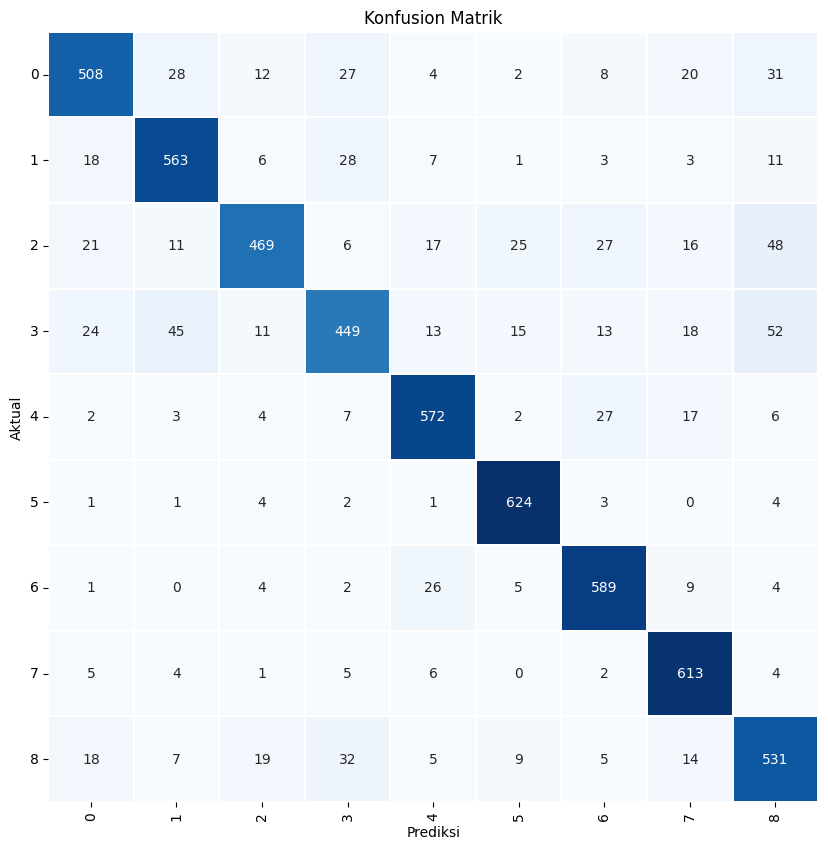

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual, prediction)

kategori_labels = [f'{i}' for i in range(len(cm))]

# Membuat visualisasi matriks konfusi dengan Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.1, cbar=False, square=True,
            xticklabels=kategori_labels, yticklabels=kategori_labels, cbar_kws={"orientation": "horizontal"})
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Konfusion Matrik")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [19]:
from helper import save_model_ml

save_model_ml(model_1, "model_1p1_88_85")

# Model_1p2

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.tanya, df.kategori, test_size=0.3, stratify=df.kategori, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20157,), (8639,), (20157,), (8639,))

In [7]:
tfidf_vector = TfidfVectorizer()
X_train = tfidf_vector.fit_transform(X_train)
# X_test = tfidf_vector.transform(X_test)

['tfidf_vectorizer.pkl']

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_1_2 = RandomizedSearchCV(rf, rf_params, cv=3, n_iter=10, verbose=1, random_state=42, n_jobs=-1)
model_1_2.fit(X_train, y_train)

print("Best Parameters:")
print(model_1_2.best_params_)

model_1_2.score(X_train, y_train), model_1_2.best_score_, model_1_2.score(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:
{'n_estimators': 411, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 32}


(0.8917497643498536, 0.8523589819913678, 0.8561176062044218)

In [23]:
prediction = model_1_2.predict(X_test)

actual = y_test.values

print(actual)
print(prediction)

[5 4 4 ... 1 2 7]
[5 4 4 ... 1 2 7]


In [24]:
from sklearn.metrics import classification_report

report = classification_report(actual,prediction, target_names=label)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

Asam Lambung       0.84      0.80      0.82       960
       Batuk       0.84      0.87      0.85       959
      Cedera       0.88      0.74      0.80       960
       Demam       0.79      0.72      0.75       960
       Gatal       0.89      0.91      0.90       960
        Gigi       0.91      0.98      0.94       960
     Jerawat       0.91      0.92      0.91       960
  Menstruasi       0.87      0.96      0.91       960
Sakit Kepala       0.78      0.81      0.80       960

    accuracy                           0.86      8639
   macro avg       0.86      0.86      0.85      8639
weighted avg       0.86      0.86      0.85      8639



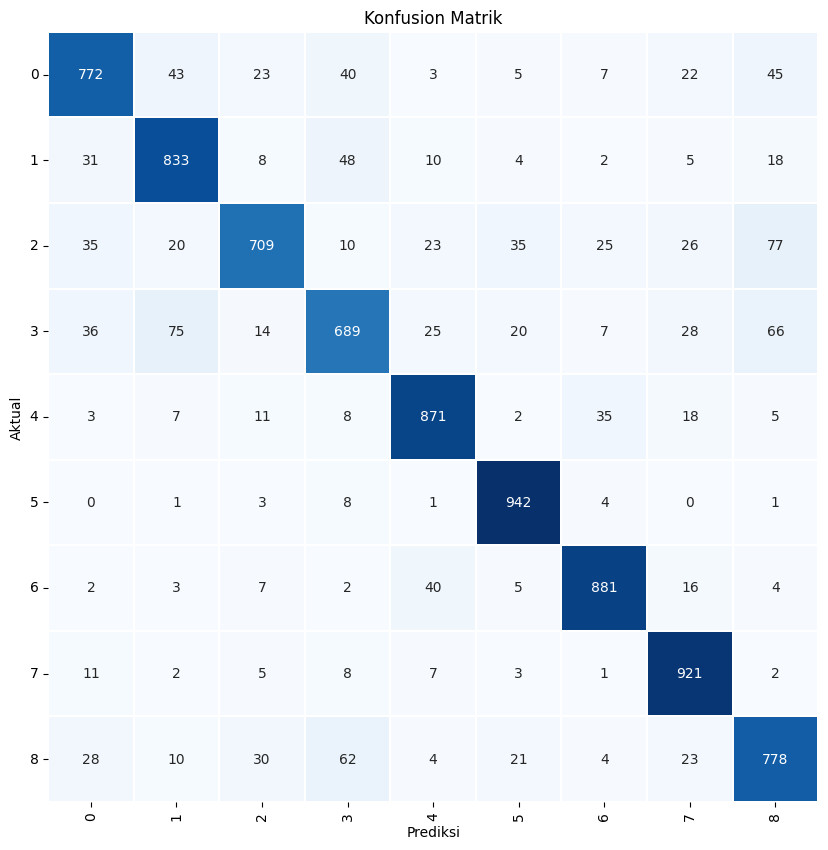

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual, prediction)

kategori_labels = [f'{i}' for i in range(len(cm))]

# Membuat visualisasi matriks konfusi dengan Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.1, cbar=False, square=True,
            xticklabels=kategori_labels, yticklabels=kategori_labels, cbar_kws={"orientation": "horizontal"})
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Konfusion Matrik")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [29]:
from helper import save_model_ml

save_model_ml(model_1_2, "model_1p2_89_86")

# Model_1p3

In [30]:
from gensim.models import FastText
model_fasttext = FastText.load("../language_model/healthy_chat_13_labels.bin")
model_fasttext = model_fasttext.wv

In [34]:
import sys
sys.path.append('../')
from word_sent import WordToSentVector

model = WordToSentVector(df.tanya, model_fasttext)
model = model.fit()

100%|██████████| 28796/28796 [00:05<00:00, 5360.49it/s]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(model, df.kategori, test_size=0.3, stratify=df.kategori, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20157, 100), (8639, 100), (20157,), (8639,))

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

model_1_3 = RandomizedSearchCV(rf, rf_params, cv=3, n_iter=10, verbose=1, random_state=42, n_jobs=-1)
model_1_3.fit(X_train, y_train)

print("Best Parameters:")
print(model_1_3.best_params_)

model_1_3.score(X_train, y_train), model_1_3.best_score_, model_1_3.score(X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters:
{'n_estimators': 411, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 32}


(0.983777347819616, 0.5587140943592797, 0.5638384072230582)

In [37]:
from helper import save_model_ml

save_model_ml(model_1_3, "model_1p3_98_56")